# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### **1.1 Load the Data**

In [3]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [4]:
# Check the first few entries
df.head(10)

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   
5        24368   38  Female                 3  Technology            9977   
6        64970   47    Male                23   Education            3681   
7        36999   48    Male                16     Finance           11223   
8        32714   57    Male                44   Education            3773   
9        15944   24  Female                 1  Healthcare            7319   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   
5              Fair             High      Below Average                     3   
6              Fair             High               High                     1   
7         Excellent        Very High               High                     2   
8              Good           Medium               High                     1   
9              Poor             High            Average                     1   

     ...    Number of Dependents  Job Level Company Size  \
0    ...                       0        Mid       Medium   
1    ...                       3        Mid       Medium   
2    ...                       3        Mid       Medium   
3    ...                       2        Mid        Small   
4    ...                       0     Senior       Medium   
5    ...                       0        Mid       Medium   
6    ...                       3      Entry        Small   
7    ...                       4      Entry       Medium   
8    ...                       4      Entry       Medium   
9    ...                       4      Entry        Large   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   
5                       47.0           No                       No   
6                       93.0           No                       No   
7                       88.0           No                       No   
8                       75.0           No                       No   
9                        NaN           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  
5                      Yes                Fair                 High      Left  
6                       No                Good               Medium      Left  
7                       No           Excellent                  Low    Stayed  
8                       No                Fair               Medium    Stayed  
9                      Yes     

In [5]:
# Inspect the shape of the dataset
print(df.shape)

(74610, 24)


In [6]:
# Inspect the different columns in the dataset
print(df.columns)

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
print(df.describe())
print(df.describe(include='object'))

        Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.00000

### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
Employee ID                   74610 non-null int64
Age                           74610 non-null int64
Gender                        74610 non-null object
Years at Company              74610 non-null int64
Job Role                      74610 non-null object
Monthly Income                74610 non-null int64
Work-Life Balance             74610 non-null object
Job Satisfaction              74610 non-null object
Performance Rating            74610 non-null object
Number of Promotions          74610 non-null int64
Overtime                      74610 non-null object
Distance from Home            72698 non-null float64
Education Level               74610 non-null object
Marital Status                74610 non-null object
Number of Dependents          74610 non-null int64
Job Level                     74610 non-null object
Company Size                  74610 non-null object
Company Tenu

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
print(df.isnull().sum())
print(df.isnull().any().any())

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64
True


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column
# dropping the missing values from the dataset 
df = df.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_categorical_summary(df):
    # Select categorical columns (object dtype columns)
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Display unique values for each categorical column
    for col in categorical_cols:
        print(f"Column: {col}")
        print(f"Unique values: {df[col].unique()}")
        print("-" * 40)
    
    # Check for redundant values (e.g., trailing spaces, case differences)
    print("\nChecking for redundant or similar values:")
    for col in categorical_cols:
        # Strip leading/trailing spaces and make lowercase to avoid case differences
        normalized_values = df[col].str.strip().str.lower().unique()
        print(f"Column: {col}")
        print(f"Normalized unique values: {normalized_values}")
        print("-" * 40)

# Call the function to display the categorical columns and their unique values
display_categorical_summary(df)

Column: Gender
Unique values: ['Male' 'Female']
----------------------------------------
Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Column: Overtime
Unique values: ['No' 'Yes']
----------------------------------------
Column: Education Level
Unique values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
----------------------------------------
Column: Marital Status
Unique values: ['Married' 'Divorced' 'Single']
----------------------------------------
Column: Job Level
Unique values: ['Mid' 'Senior' 'Entry']
---

In [14]:
# Check the data
display_categorical_summary(df)
print(df.head())

Column: Gender
Unique values: ['Male' 'Female']
----------------------------------------
Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Column: Overtime
Unique values: ['No' 'Yes']
----------------------------------------
Column: Education Level
Unique values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
----------------------------------------
Column: Marital Status
Unique values: ['Married' 'Divorced' 'Single']
----------------------------------------
Column: Job Level
Unique values: ['Mid' 'Senior' 'Entry']
---

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

Dropping columns - "Employee ID" and "Company Tenure in(In Months)".

In [15]:
# Drop redundant columns which are not required for modelling
df.drop(columns=["Employee ID", "Company Tenure (In Months)"], inplace=True)

In [16]:
# resetting the index

df.reset_index(drop=True, inplace=True)

In [17]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime    ...     Marital Status Number of Dependents Job Level  \
0       No    ...            Married                    0       Mid   
1       No    ...           Divorced                    3       Mid   
2       No    ...            Married                    3       Mid   
3       No    ...             Single                    2       Mid   
4      Yes    ...           Divorced                    0    Senior   

   Company Size Remote Work Leadership Opportunities Innovation Opportunities  \
0        Medium          No                       No                       No   
1        Medium          No                       No                       No   
2        Medium          No                       No                       No   
3         Small         Yes                       No                       No   
4        Medium          No                       No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed  

[5 rows x 22 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70635 entries, 0 to 70634
Data columns (total 22 columns):
Age                         70635 non-null int64
Gender                      70635 non-null object
Years at Company            70635 non-null int64
Job Role                    70635 non-null object
Monthly Income              70635 non-null int64
Work-Life Balance           70635 non-null object
Job Satisfaction            70635 non-null object
Performance Rating          70635 non-null object
Number of Promotions        70635 non-null int64
Overtime                    70635 non-null object
Distance from Home          70635 non-null float64
Education Level             70635 non-null object
Marital Status              70635 non-null object
Number of Dependents        70635 non-null int64
Job Level                   70635 non-null object
Company Size                70635 non-null object
Remote Work                 70635 non-null object
Leadership Opportunities    70635 non-null ob

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [19]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [20]:
# Put all the feature variables in X
target_column = 'Attrition'
X = df.drop(columns=[target_column])
y = df[target_column]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [21]:
# Split the data into 70% train data and 30% validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (49444, 21)
Shape of X_val: (21191, 21)
Shape of y_train: (49444,)
Shape of y_val: (21191,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [22]:
# Select numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns # Select numerical columns from the training data
print("Numerical columns:", numerical_cols)
print(X_train[numerical_cols].describe()) # Summary statistics for numerical columns

Numerical columns: Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')
                Age  Years at Company  Monthly Income  Number of Promotions  \
count  49444.000000      49444.000000    49444.000000          49444.000000   
mean      38.516686         15.686696     7347.359538              0.835187   
std       12.077142         11.211699     2565.729557              0.996423   
min       18.000000          1.000000     1226.000000              0.000000   
25%       28.000000          7.000000     5658.000000              0.000000   
50%       39.000000         13.000000     7367.500000              1.000000   
75%       49.000000         23.000000     8880.000000              1.000000   
max       59.000000         51.000000    50030.000000              4.000000   

       Distance from Home  Number of Dependents  
count        49444.000000          49444.000000  
mean            4

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

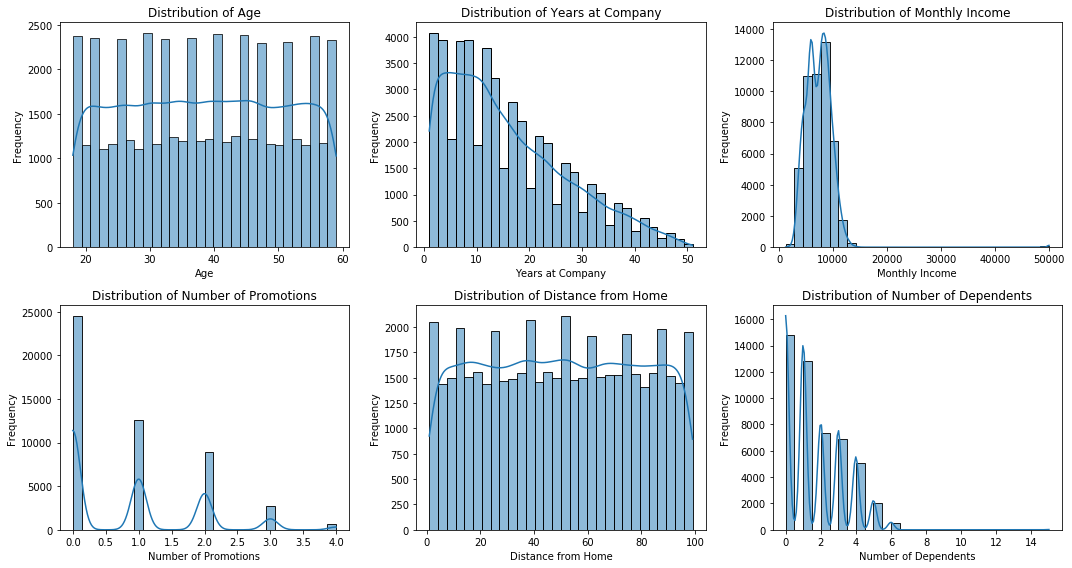

In [23]:
# Plot all the numerical columns to understand their distribution

import math

# List of numerical columns
numerical_cols = [
    'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
    'Distance from Home', 'Number of Dependents'
]

# Grid setup
num_cols = len(numerical_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [24]:
# Create correlation matrix for numerical columns
corr_matrix = X_train[numerical_cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

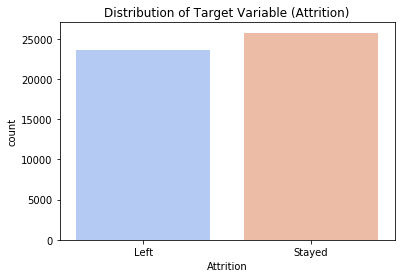

Stayed    0.521499
Left      0.478501
Name: Attrition, dtype: float64


In [25]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train,palette='coolwarm')
plt.title('Distribution of Target Variable (Attrition)')
plt.show()
print(y_train.value_counts(normalize=True))

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [26]:
# Plot distribution for each categorical column with target variable
import matplotlib.pyplot as plt
import seaborn as sns
import math

categorical_cols = [
    'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
    'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition'
]

# Grid setup
num_cols = len(categorical_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_cols / cols)

# Set up the figure size
plt.figure(figsize=(cols * 6, rows * 5))

# Loop through each categorical column and plot
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index , palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**



Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [27]:
# Select numerical columns

numerical_cols = X_val.select_dtypes(include=['float64', 'int64']).columns # Select numerical columns from the validation data
print("Numerical columns:", numerical_cols)
print(X_val[numerical_cols].describe()) # Summary statistics for numerical columns

Numerical columns: Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')
                Age  Years at Company  Monthly Income  Number of Promotions  \
count  21191.000000      21191.000000    21191.000000          21191.000000   
mean      38.561418         15.802605     7330.230994              0.823746   
std       12.095510         11.251908     2477.826554              0.990390   
min       18.000000          1.000000     1316.000000              0.000000   
25%       28.000000          7.000000     5654.000000              0.000000   
50%       39.000000         13.000000     7325.000000              0.000000   
75%       49.000000         23.000000     8877.500000              2.000000   
max       59.000000         51.000000    50030.000000              4.000000   

       Distance from Home  Number of Dependents  
count        21191.000000          21191.000000  
mean            5

5.1.2 Plot distribution of numerical columns

In [28]:
# Plot all the numerical columns to understand their distribution
import math  # Import the math module

# List of numerical columns
numerical_cols = [
    'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
    'Distance from Home', 'Number of Dependents'
]

# Grid setup
num_cols = len(numerical_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_cols / cols)

# Set up the figure size
plt.figure(figsize=(cols * 5, rows * 4))

# Loop through each column and plot
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_val[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

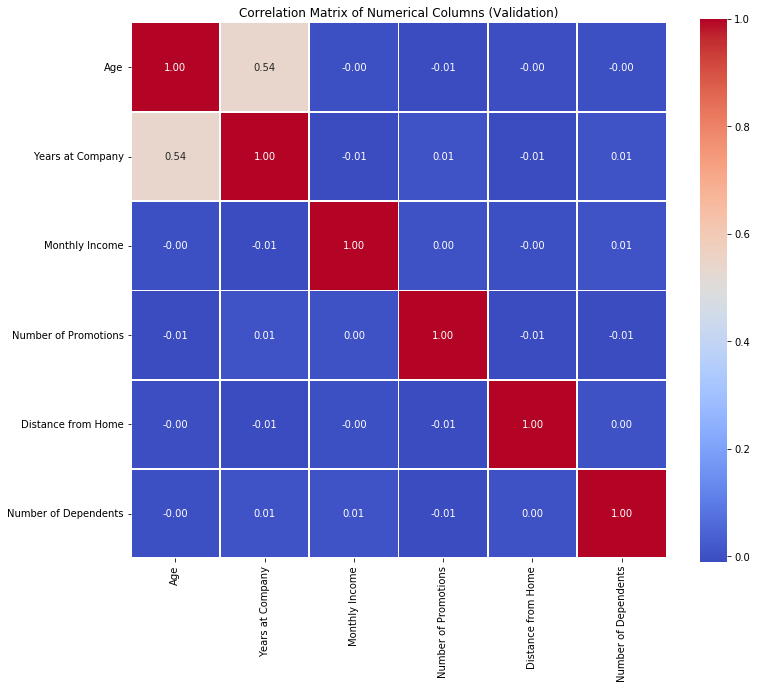

In [29]:
# Create correlation matrix for numerical columns
# Check the correlation among different numerical variables.
corr_matrix = X_val[numerical_cols].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.7)
plt.title('Correlation Matrix of Numerical Columns (Validation)')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

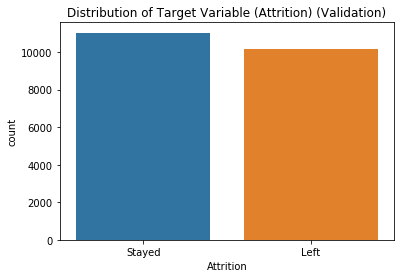

Stayed    0.520268
Left      0.479732
Name: Attrition, dtype: float64


In [30]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_val)
plt.title('Distribution of Target Variable (Attrition) (Validation)')
plt.show()
print(y_val.value_counts(normalize=True))

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [31]:
import math  # Import the math module

# List of categorical columns
categorical_cols = [
    'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
    'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition'
]

# Grid setup
num_cols = len(categorical_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_cols / cols)

# Set up the figure size
plt.figure(figsize=(cols * 6, rows * 5))

# Loop through each categorical column and plot
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=X_val, x=col, hue=y_val, order=X_val[col].value_counts().index)
    plt.title(f'{col} vs Attrition (Validation)')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [32]:
# Check the categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [33]:
# Create dummy variables using the 'get_dummies' for independent columns.
all_cat_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 
                'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 
                'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 
                'Company Reputation', 'Employee Recognition']

# Create dummy variables for all categorical columns
X_dummies = pd.get_dummies(X_train[all_cat_cols], drop_first=True)
X_dummies = X_dummies.astype(int)

# Add the results to the master DataFrame

X_train = pd.concat([X_train, X_dummies], axis=1)

In [34]:
X_train.head()

Age  Gender  Years at Company   Job Role  Monthly Income  \
38917   46  Female                26  Education            4617   
65762   43    Male                26  Education            4447   
26506   27    Male                 8    Finance            9762   
2398    47  Female                29      Media            5244   
69696   25  Female                10  Education            4455   

      Work-Life Balance Job Satisfaction Performance Rating  \
38917              Fair             High                Low   
65762              Good             High               High   
26506         Excellent        Very High      Below Average   
2398               Fair           Medium            Average   
69696              Good             High               High   

       Number of Promotions Overtime              ...                \
38917                     2       No              ...                 
65762                     3       No              ...                 
26506                     0      Yes              ...                 
2398                      2      Yes              ...                 
69696                     0       No              ...                 

       Company Size_Small Remote Work_Yes Leadership Opportunities_Yes  \
38917                   0               0                            0   
65762                   1               0                            0   
26506                   0               0                            0   
2398                    0               0                            0   
69696                   0               0                            0   

       Innovation Opportunities_Yes Company Reputation_Fair  \
38917                             0                       0   
65762                             1                       0   
26506                             1                       0   
2398                              0                       0   
69696                             0                       0   

      Company Reputation_Good Company Reputation_Poor  \
38917                       1                       0   
65762                       0                       1   
26506                       1                       0   
2398                        0                       0   
69696                       1                       0   

      Employee Recognition_Low Employee Recognition_Medium  \
38917                        0                           0   
65762                        1                           0   
26506                        1                           0   
2398                         1                           0   
69696                        0                           1   

      Employee Recognition_Very High  
38917                              0  
65762                              0  
26506                              0  
2398                               0  
69696                              0  

[5 rows x 55 columns]

Now, drop the original categorical columns and check the DataFrame

In [35]:
# Drop the original categorical columns and check the DataFrame

X_train= X_train.drop(columns=categorical_cols, errors='ignore')

X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
38917   46                26            4617                     2   
65762   43                26            4447                     3   
26506   27                 8            9762                     0   
2398    47                29            5244                     2   
69696   25                10            4455                     0   

       Distance from Home  Number of Dependents  Gender_Male  \
38917                59.0                     2            0   
65762                64.0                     0            1   
26506                84.0                     1            1   
2398                 59.0                     1            0   
69696                36.0                     0            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  \
38917                 0                    0               0   
65762                 0                    0               0   
26506                 1                    0               0   
2398                  0                    0               1   
69696                 0                    0               0   

                    ...                Company Size_Small  Remote Work_Yes  \
38917               ...                                 0                0   
65762               ...                                 1                0   
26506               ...                                 0                0   
2398                ...                                 0                0   
69696               ...                                 0                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
38917                             0                             0   
65762                             0                             1   
26506                             0                             1   
2398                              0                             0   
69696                             0                             0   

       Company Reputation_Fair  Company Reputation_Good  \
38917                        0                        1   
65762                        0                        0   
26506                        0                        1   
2398                         0                        0   
69696                        0                        1   

       Company Reputation_Poor  Employee Recognition_Low  \
38917                        0                         0   
65762                        1                         1   
26506                        0                         1   
2398                         0                         1   
69696                        0                         0   

       Employee Recognition_Medium  Employee Recognition_Very High  
38917                            0                               0  
65762                            0                               0  
26506                            0                               0  
2398                             0                               0  
69696                            1                               0  

[5 rows x 40 columns]

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49444 entries, 38917 to 15795
Data columns (total 40 columns):
Age                                    49444 non-null int64
Years at Company                       49444 non-null int64
Monthly Income                         49444 non-null int64
Number of Promotions                   49444 non-null int64
Distance from Home                     49444 non-null float64
Number of Dependents                   49444 non-null int64
Gender_Male                            49444 non-null int32
Job Role_Finance                       49444 non-null int32
Job Role_Healthcare                    49444 non-null int32
Job Role_Media                         49444 non-null int32
Job Role_Technology                    49444 non-null int32
Work-Life Balance_Fair                 49444 non-null int32
Work-Life Balance_Good                 49444 non-null int32
Work-Life Balance_Poor                 49444 non-null int32
Job Satisfaction_Low                   49444 

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for independent columns

X_val_dummies = pd.get_dummies(X_val[all_cat_cols], drop_first=True)
X_val_dummies = X_val_dummies.astype(int)

# Add the results to the master DataFrame

X_val = pd.concat([X_val, X_val_dummies], axis=1)

In [38]:
# Drop categorical columns and check the DataFrame
# Now, drop the original categorical columns and check the DataFrame
X_val= X_val.drop(columns=categorical_cols, errors='ignore')

X_val.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
22136   46                 1            7740                     3   
13058   32                 6            8779                     1   
42644   53                10           11683                     1   
12351   50                 2            7305                     2   
2592    48                24           10114                     0   

       Distance from Home  Number of Dependents  Gender_Male  \
22136                78.0                     2            1   
13058                91.0                     0            1   
42644                71.0                     1            1   
12351                71.0                     1            0   
2592                  2.0                     1            1   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  \
22136                 0                    1               0   
13058                 1                    0               0   
42644                 0                    0               0   
12351                 0                    0               0   
2592                  0                    1               0   

                    ...                Company Size_Small  Remote Work_Yes  \
22136               ...                                 1                0   
13058               ...                                 0                1   
42644               ...                                 0                0   
12351               ...                                 0                0   
2592                ...                                 0                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
22136                             0                             0   
13058                             0                             0   
42644                             0                             0   
12351                             0                             1   
2592                              0                             0   

       Company Reputation_Fair  Company Reputation_Good  \
22136                        0                        1   
13058                        0                        0   
42644                        0                        1   
12351                        1                        0   
2592                         0                        0   

       Company Reputation_Poor  Employee Recognition_Low  \
22136                        0                         1   
13058                        1                         0   
42644                        0                         0   
12351                        0                         0   
2592                         0                         0   

       Employee Recognition_Medium  Employee Recognition_Very High  
22136                            0                               0  
13058                            0                               0  
42644                            1                               0  
12351                            0                               0  
2592                             0                               0  

[5 rows x 40 columns]

In [39]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21191 entries, 22136 to 18143
Data columns (total 40 columns):
Age                                    21191 non-null int64
Years at Company                       21191 non-null int64
Monthly Income                         21191 non-null int64
Number of Promotions                   21191 non-null int64
Distance from Home                     21191 non-null float64
Number of Dependents                   21191 non-null int64
Gender_Male                            21191 non-null int32
Job Role_Finance                       21191 non-null int32
Job Role_Healthcare                    21191 non-null int32
Job Role_Media                         21191 non-null int32
Job Role_Technology                    21191 non-null int32
Work-Life Balance_Fair                 21191 non-null int32
Work-Life Balance_Good                 21191 non-null int32
Work-Life Balance_Poor                 21191 non-null int32
Job Satisfaction_Low                   21191 

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [40]:
# Convert y_train and y_validation to DataFrame to create dummy variables

y_train = pd.DataFrame(y_train, columns=["Attrition"])
y_val = pd.DataFrame(y_val, columns=["Attrition"])

In [41]:
y_train.head()

Attrition
38917      Left
65762      Left
26506      Left
2398       Left
69696      Left

In [42]:
y_val.head()

Attrition
22136    Stayed
13058      Left
42644      Left
12351      Left
2592     Stayed

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [43]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies= pd.get_dummies(y_train, drop_first=True).astype(int)

In [44]:
print(y_train_dummies.head())

       Attrition_Stayed
38917                 0
65762                 0
26506                 0
2398                  0
69696                 0


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [45]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dummies = pd.get_dummies(y_val, drop_first=True).astype(int)

In [46]:
print(y_val_dummies.head())

       Attrition_Stayed
22136                 1
13058                 0
42644                 0
12351                 0
2592                  1


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [47]:
# Drop redundant columns from both train and validation

The redundant column already dropped in the above code from train and validation for dependent variable

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [48]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [49]:
# Scale the numeric features present in the training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Scale the numerical features present in the validation set
X_val[numeric_cols] = scaler.fit_transform(X_val[numeric_cols])

## **7. Model Building** <font color = red>[40 marks]</font>

### 
**7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [50]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [51]:
# Import RFE and select 15 variables
model = LogisticRegression(max_iter=1000, solver='liblinear')

rfe = RFE(estimator=model, n_features_to_select=15)

rfe.fit(X_train, y_train)

C:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_features_to_select=15)

In [52]:
# Display the features selected by RFE
selected_features = X_train.columns[rfe.support_]
print("Top 15 selected features")
print(selected_features)

Top 15 selected features
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [53]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [54]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]


In [55]:
# View the training data
X_train_rfe.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38917            0                       1                       0   
65762            1                       0                       0   
26506            1                       0                       0   
2398             0                       1                       0   
69696            0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38917                     0                           0   
65762                     0                           0   
26506                     0                           1   
2398                      0                           0   
69696                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38917                                 0                       1             0   
65762                                 0                       0             0   
26506                                 1                       0             1   
2398                                  0                       0             1   
69696                                 0                       0             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
38917                    0                      1              0   
65762                    0                      1              0   
26506                    0                      1              1   
2398                     1                      0              1   
69696                    0                      1              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
38917                 0                0                        0   
65762                 0                0                        0   
26506                 0                0                        0   
2398                  0                0                        0   
69696                 0                0                        0   

       Company Reputation_Poor  
38917                        0  
65762                        1  
26506                        0  
2398                         0  
69696                        0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [56]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_rfe)



7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [57]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
lm= sm.Logit(y_train_dummies, X_train_sm)

lm2 =lm.fit()

print(lm2.summary())


Optimization terminated successfully.
         Current function value: 0.506106
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.2689
Time:                        23:36:03   Log-Likelihood:                -25024.
converged:                       True   LL-Null:                       -34226.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2601      0.028      9.20

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.




7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [58]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

print(vif_data)

                            Variable       VIF
0                              const  7.167050
1                        Gender_Male  1.000463
2             Work-Life Balance_Fair  1.076163
3             Work-Life Balance_Poor  1.076193
4               Job Satisfaction_Low  1.029002
5         Job Satisfaction_Very High  1.028895
6   Performance Rating_Below Average  1.009633
7             Performance Rating_Low  1.009969
8                       Overtime_Yes  1.000379
9                Education Level_PhD  1.000218
10             Marital Status_Single  1.000352
11                     Job Level_Mid  1.203866
12                  Job Level_Senior  1.203944
13                   Remote Work_Yes  1.000375
14           Company Reputation_Fair  1.067230
15           Company Reputation_Poor  1.067336


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [60]:
# Predict the probabilities on the training set
y_train_pred = lm2.predict(X_train_sm)
y_train_pred[:10]

38917    0.041969
65762    0.165156
26506    0.262070
2398     0.785798
69696    0.192069
8971     0.191762
48124    0.192069
55760    0.264454
20630    0.267606
65168    0.090101
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [61]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04196947, 0.16515553, 0.26206987, 0.78579766, 0.19206875,
       0.19176242, 0.19206875, 0.26445394, 0.26760629, 0.09010113])

In [62]:
y_train_pred.shape

(49444,)

In [63]:
y_train_new = y_train_dummies.values.flatten()

y_train_new.shape

(49444,)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [64]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
final_df = pd.DataFrame({'Actual Stayed Flag': y_train_new, 'Predicted Probabilities': y_train_pred})
final_df.head()

Actual Stayed Flag  Predicted Probabilities
0                   0                 0.041969
1                   0                 0.165156
2                   0                 0.262070
3                   0                 0.785798
4                   0                 0.192069

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [65]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
final_df["Predicted"]= (final_df["Predicted Probabilities"]>0.5).astype(int)
final_df.head()

Actual Stayed Flag  Predicted Probabilities  Predicted
0                   0                 0.041969          0
1                   0                 0.165156          0
2                   0                 0.262070          0
3                   0                 0.785798          1
4                   0                 0.192069          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [66]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Check the overall accuracy
accuracy= accuracy_score(final_df["Actual Stayed Flag"], final_df["Predicted"])
print(accuracy)

0.7391594531186797


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [67]:
# Create confusion matrix
cm = confusion_matrix(final_df['Actual Stayed Flag'], final_df['Predicted'])

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17082  6577]
 [ 6320 19465]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [68]:
# Create variables for true positive, true negative, false positive and false negative

tn,fp,fn,tp = cm.ravel()

print(f"True negatives (TN):{tn}")
print(f"False positive (FP):{fp}")
print(f"False negatives (FN):{fn}")
print(f"True positive (TP):{tp}")

True negatives (TN):17082
False positive (FP):6577
False negatives (FN):6320
True positive (TP):19465


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [69]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
sensitivity

0.7548962575140585

In [70]:
# Calculate specificity
specificity = tn / (tn + fp)
specificity

0.7220085379770912

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [71]:
# Calculate precision
precision = tp / (tp + fp)
precision

0.7474464326856616

In [72]:
# Calculate recall
recall  = tp / (tp + fn)
recall

0.7548962575140585

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [73]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

   
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


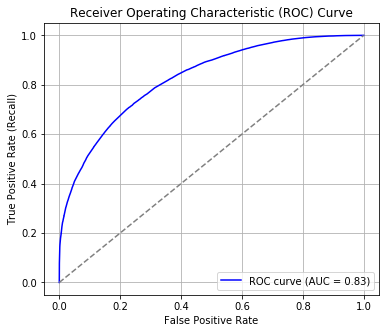

In [74]:
# Call the ROC function
plot_roc_curve(final_df['Actual Stayed Flag'], final_df['Predicted Probabilities'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [75]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_df[i]= final_df["Predicted Probabilities"].map(lambda x: 1 if x > i else 0)
final_df.head()

Actual Stayed Flag  Predicted Probabilities  Predicted  0.0  0.1  0.2  0.3  \
0                   0                 0.041969          0    1    0    0    0   
1                   0                 0.165156          0    1    1    0    0   
2                   0                 0.262070          0    1    1    1    0   
3                   0                 0.785798          1    1    1    1    1   
4                   0                 0.192069          0    1    1    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    0    0  
4    0    0    0    0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [76]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(final_df["Actual Stayed Flag"], final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521499  1.000000  0.000000
0.1   0.1  0.590628  0.994687  0.150260
0.2   0.2  0.658260  0.964165  0.324866
0.3   0.3  0.704534  0.906535  0.484382
0.4   0.4  0.731312  0.840838  0.611945
0.5   0.5  0.739159  0.754896  0.722009
0.6   0.6  0.731211  0.645065  0.825098
0.7   0.7  0.704676  0.526779  0.898559
0.8   0.8  0.659069  0.385612  0.957099
0.9   0.9  0.588828  0.218732  0.992181


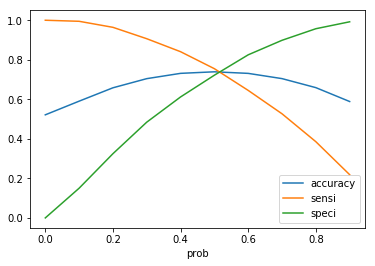

In [77]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [78]:
# Create a column for final prediction based on the optimal cutoff
final_df["Final_prediction"]= final_df["Predicted Probabilities"].map( lambda x: 1 if x > 0.3 else 0)
final_df.head()

Actual Stayed Flag  Predicted Probabilities  Predicted  0.0  0.1  0.2  0.3  \
0                   0                 0.041969          0    1    0    0    0   
1                   0                 0.165156          0    1    1    0    0   
2                   0                 0.262070          0    1    1    1    0   
3                   0                 0.785798          1    1    1    1    1   
4                   0                 0.192069          0    1    1    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  Final_prediction  
0    0    0    0    0    0    0                 0  
1    0    0    0    0    0    0                 0  
2    0    0    0    0    0    0                 0  
3    1    1    1    1    0    0                 1  
4    0    0    0    0    0    0                 0

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [79]:
# Calculate the accuracy
metrics.accuracy_score(final_df["Actual Stayed Flag"], final_df["Final_prediction"])

0.7045344227813284

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [80]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(final_df["Actual Stayed Flag"], final_df["Final_prediction"])
confusion2

array([[11460, 12199],
       [ 2410, 23375]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [81]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [82]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN)
sensitivity

0.9065348070583673

In [83]:
# Calculate Specificity
specificity = tn / (tn + fp)
specificity

0.7220085379770912

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [84]:
# Calculate Precision
precision = tp / (tp + fp)
precision

0.7474464326856616

In [85]:
# Calculate Recall
Recall = TP / (TP + FN)
Recall

0.9065348070583673

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [86]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [87]:
# Check actual and predicted values from initial model
final_df["Actual Stayed Flag"], final_df["Final_prediction"]

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        1
 9        0
 10       1
 11       1
 12       1
 13       1
 14       0
 15       1
 16       1
 17       1
 18       1
 19       0
 20       0
 21       1
 22       1
 23       1
 24       1
 25       0
 26       0
 27       0
 28       1
 29       1
         ..
 49414    0
 49415    0
 49416    0
 49417    1
 49418    0
 49419    1
 49420    0
 49421    1
 49422    1
 49423    0
 49424    0
 49425    0
 49426    1
 49427    0
 49428    0
 49429    1
 49430    1
 49431    0
 49432    1
 49433    1
 49434    0
 49435    0
 49436    1
 49437    0
 49438    0
 49439    1
 49440    0
 49441    0
 49442    0
 49443    1
 Name: Actual Stayed Flag, Length: 49444, dtype: int32, 0        0
 1        0
 2        0
 3        1
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       1
 11       1
 12       1
 13       1
 14       1
 15       1
 16       1
 17      

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [88]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(final_df["Actual Stayed Flag"], final_df["Predicted Probabilities"])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [89]:
# Select the relevant features for validation set

# Select the relevant features for validation set
X_val_rfe = X_val[col]

In [90]:
# View the validation data
X_val_rfe.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
22136            1                       0                       0   
13058            1                       1                       0   
42644            1                       0                       1   
12351            0                       0                       1   
2592             1                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
22136                     0                           1   
13058                     0                           0   
42644                     0                           0   
12351                     1                           0   
2592                      0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
22136                                 0                       0             0   
13058                                 0                       0             0   
42644                                 0                       0             0   
12351                                 0                       0             1   
2592                                  0                       1             0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
22136                    0                      0              0   
13058                    0                      1              0   
42644                    0                      0              0   
12351                    0                      0              0   
2592                     0                      0              0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
22136                 1                0                        0   
13058                 0                1                        0   
42644                 0                0                        0   
12351                 0                0                        1   
2592                  1                0                        0   

       Company Reputation_Poor  
22136                        0  
13058                        1  
42644                        0  
12351                        0  
2592                         0

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [91]:
# Add constant to X_validation

X_val_sm = sm.add_constant(X_val_rfe)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [92]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = lm2.predict(X_val_sm)
y_validation_pred[:10]


22136    0.946923
13058    0.266727
42644    0.396343
12351    0.083073
2592     0.940507
51646    0.433286
59376    0.578743
56744    0.905997
28542    0.366248
33140    0.092796
dtype: float64

In [93]:
# Reshape it into an array
y_validation_pred = y_validation_pred.values.reshape(-1)
y_validation_pred[:10]

array([0.94692306, 0.26672651, 0.39634309, 0.08307259, 0.94050705,
       0.43328562, 0.57874347, 0.90599699, 0.36624823, 0.09279621])

In [94]:
y_validation_pred.shape

(21191,)

In [95]:
y_val_new = y_val_dummies.values.flatten()

y_val_new.shape

(21191,)

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [96]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
final_df = pd.DataFrame({'Actual Stayed Flag': y_val_new, 'Predicted Probabilities': y_validation_pred})
final_df.head()

Actual Stayed Flag  Predicted Probabilities
0                   1                 0.946923
1                   0                 0.266727
2                   0                 0.396343
3                   0                 0.083073
4                   1                 0.940507

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [97]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
final_df["final_prediction"]= (final_df["Predicted Probabilities"]>0.5).astype(int)
final_df.head()



Actual Stayed Flag  Predicted Probabilities  final_prediction
0                   1                 0.946923                 1
1                   0                 0.266727                 0
2                   0                 0.396343                 0
3                   0                 0.083073                 0
4                   1                 0.940507                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [98]:
# Check the overall accuracy
accuracy = metrics.accuracy_score(final_df["Actual Stayed Flag"], final_df["final_prediction"])

# Print the accuracy
print(f"Accuracy of the model on the validation set: {accuracy:.4f}")


Accuracy of the model on the validation set: 0.7364


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [99]:
# Create confusion matrix
cm = confusion_matrix(final_df['Actual Stayed Flag'], final_df['final_prediction'])

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7360 2806]
 [2779 8246]]


In [100]:
# Create variables for true positive, true negative, false positive and false negative

tn,fp,fn,tp = cm.ravel()

print(f"True negatives (TN):{tn}")
print(f"False positive (FP):{fp}")
print(f"False negatives (FN):{fn}")
print(f"True positive (TP):{tp}")

True negatives (TN):7360
False positive (FP):2806
False negatives (FN):2779
True positive (TP):8246


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [101]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)

print(f"Sensitivity (Recall): {sensitivity:.4f}")

Sensitivity (Recall): 0.7479


In [102]:
# Calculate specificity
specificity = tn / (tn + fp)

print(f"Specificity: {specificity:.4f}")

Specificity: 0.7240


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [103]:
# Calculate precision
precision = tp / (tp + fp)

print("precision : " +str(precision))

precision : 0.7461093014838943


In [104]:
# Calculate recall
recall = tp / (tp + fn)

print("recall : " +str(recall))

recall : 0.7479365079365079


## Conclusion



The model accuracy is 0.75 on validation set. which is quite decent.